<a href="https://colab.research.google.com/github/DUNGTK2004/Pytorch-Tutorial/blob/main/Pytorch_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#import Pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"Pytorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

Pytorch version: 2.4.1+cu121
torchvision version: 0.19.1+cu121


In [22]:
#Set up training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

#Set up testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [23]:
# See first training sample
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [24]:
# num samples
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [25]:
# see classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '0')

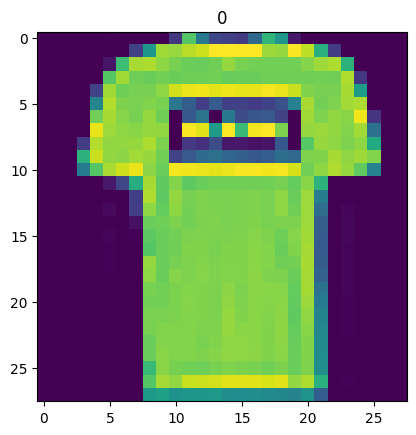

In [26]:
#Visualizing our data
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze()) # loai bo cac chieu bang 1
plt.title(label)

Text(0.5, 1.0, 'T-shirt/top')

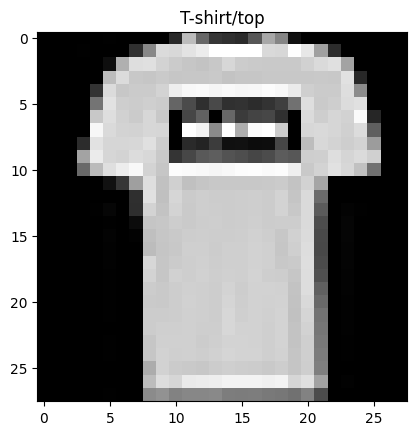

In [27]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

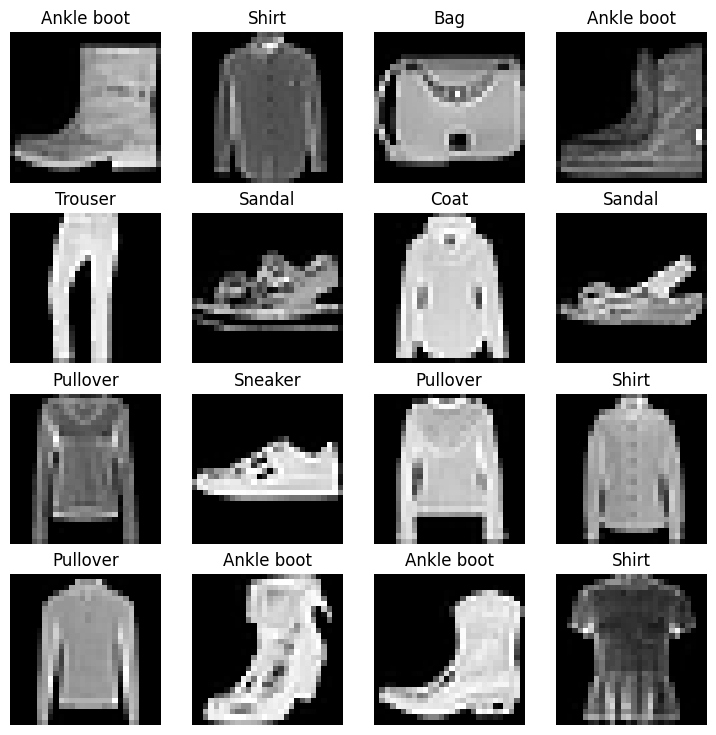

In [28]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols=4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [29]:
from torch.utils.data import DataLoader

# batch size
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f38e2072e30>, <torch.utils.data.dataloader.DataLoader object at 0x7f38e2070a30>)
length of train dataloader: 1875 batches of 32
length of test dataloader: 313 batches of 32


In [30]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


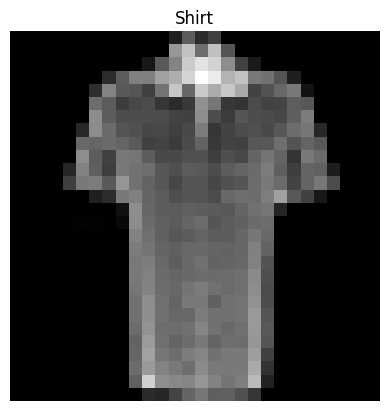

In [31]:
#show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

In [32]:
# Baseline model
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
out = flatten_model(x)

#Print out what happened
print(f"shape begin{x.shape}")
print(f"shape after flatten {out.shape}")

print(out)

shape begintorch.Size([1, 28, 28])
shape after flatten torch.Size([1, 784])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 

In [33]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [34]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              )
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [35]:
import requests
from pathlib import Path

#Download helper functions form Learn Pytorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download")

else:
  print("downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_function.py already exists, skipping download


In [36]:
# import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [37]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [38]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Num epoch
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  #Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1.Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} sample")

  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)

  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1.Forward pass
      test_pred = model_0(X)

      # 2.Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

      # 3.Calculate accuracy (preds need to be as y_true)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Calculations on test metrics and need to happen inside torch.inference_model()
    # Divide total test loss by length of the test dataloader (per batch)
    test_loss /= len(test_dataloader)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)

  # print out what's happenning
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 sample
Looked at 12800/60000 sample
Looked at 25600/60000 sample
Looked at 38400/60000 sample
Looked at 51200/60000 sample

Train loss: 0.59039 | Test loss: 0.51016, Test acc: 82.04%

Epoch: 1
------
Looked at 0/60000 sample
Looked at 12800/60000 sample
Looked at 25600/60000 sample
Looked at 38400/60000 sample
Looked at 51200/60000 sample

Train loss: 0.47435 | Test loss: 0.52677, Test acc: 81.68%

Epoch: 2
------
Looked at 0/60000 sample
Looked at 12800/60000 sample
Looked at 25600/60000 sample
Looked at 38400/60000 sample
Looked at 51200/60000 sample

Train loss: 0.45367 | Test loss: 0.51264, Test acc: 83.00%

Train time on cpu: 29.324 seconds


In [61]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn, device: torch.device=device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # Make predictions with the model
      y_pred = model(X)
      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn, device="cpu")
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5119838714599609,
 'model_acc': 83.02715654952077}

In [40]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [41]:
# Non-linear model
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.stack_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.stack_layer(x)

In [42]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [43]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [44]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  train_loss, train_acc=0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train loss: {train_loss:.5f} | train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [45]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(data_loader=train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
train loss: 1.09199 | train accuracy: 61.34%
test loss: 0.95690 | Test accuracy: 64.98%

Epoch: 1
-------
train loss: 0.73779 | train accuracy: 73.69%
test loss: 0.72388 | Test accuracy: 74.21%

Epoch: 2
-------
train loss: 0.66776 | train accuracy: 76.08%
test loss: 0.68751 | Test accuracy: 75.64%

Train time on cuda: 32.958 seconds


In [46]:
torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn= accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.687375545501709,
 'model_acc': 75.64896166134186}

In [47]:
# model_0_results

### Convolutional neural network

In [48]:
class FashionMNISTModelV2(nn.Module):
  #TinyVGG
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [49]:
torch.manual_seed(42)

#Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {images.shape} => [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) => [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [50]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_layer(test_image.unsqueeze(dim=0)).shape
# torch.__version__

torch.Size([1, 10, 62, 62])

In [51]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5,5),
                         stride=2,
                         padding=0)
conv_layer_2(test_image)

tensor([[[-0.5948, -1.5861,  0.8046,  ..., -0.6760, -0.4141,  0.4623],
         [-0.0281, -1.2165,  0.5269,  ..., -0.8251, -0.2775, -0.2484],
         [-0.1658,  0.4648, -0.3005,  ..., -0.9099, -0.4357,  0.2979],
         ...,
         [ 0.6630,  0.1141,  0.5544,  ..., -1.0168, -0.3645,  0.4765],
         [ 0.3496,  0.8934, -0.5567,  ..., -0.2924,  0.2305,  1.0192],
         [-0.8416,  0.1793, -0.1085,  ...,  0.1477, -1.6401, -0.6631]],

        [[ 0.1400, -1.0109,  0.1728,  ..., -0.6495, -0.2606, -0.7517],
         [ 0.1587,  1.5218,  0.3420,  ...,  0.5767,  0.7092,  0.1965],
         [ 0.0420,  0.2219, -0.5887,  ..., -1.6640, -0.6538, -0.6595],
         ...,
         [-0.6441, -0.2478,  0.4476,  ..., -0.6757,  0.0094, -0.1254],
         [ 0.5479,  0.7785,  1.0805,  ..., -0.3178,  0.4692, -0.1884],
         [-0.6935,  0.0421, -0.4753,  ...,  0.2703, -0.1246,  0.7032]],

        [[ 1.7556, -0.7634,  0.1600,  ...,  0.1093, -0.2073, -0.3486],
         [ 0.2397, -0.0703, -0.0018,  ...,  0

In [52]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [53]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape}")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape}")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5])

conv_layer_2 bias shape: 
torch.Size([10])


In [54]:
# Print out original image shape without and with unsqueezed dimension
print(f"Original image shape: {test_image.shape}")
print(f"Original image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}")
# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Original image shape: torch.Size([3, 64, 64])
Original image unsqueezed shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [55]:

torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"random tensor:\n{random_tensor}")
print(f"random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the max value form the random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the max value form the random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [56]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [57]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(data_loader=train_dataloader,
    model=model_2,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn,
    device=device
  )
  test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
  )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
train loss: 0.59360 | train accuracy: 78.36%
test loss: 0.39316 | Test accuracy: 86.03%

Epoch: 1
--------
train loss: 0.36240 | train accuracy: 86.82%
test loss: 0.39102 | Test accuracy: 86.14%

Epoch: 2
--------
train loss: 0.32591 | train accuracy: 88.28%
test loss: 0.34658 | Test accuracy: 87.42%

Train time on cuda: 38.031 seconds


In [58]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34563305974006653,
 'model_acc': 87.44009584664536}

In [62]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.511984,83.027157
1,FashionMNISTModelV1,0.687376,75.648962
2,FashionMNISTModelV2,0.345633,87.440096


In [63]:
# Add training times to results comparison
compare_results["train_time"] = [total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.511984,83.027157,29.323513
1,FashionMNISTModelV1,0.687376,75.648962,32.957527
2,FashionMNISTModelV2,0.345633,87.440096,38.031309


Text(0, 0.5, 'Model')

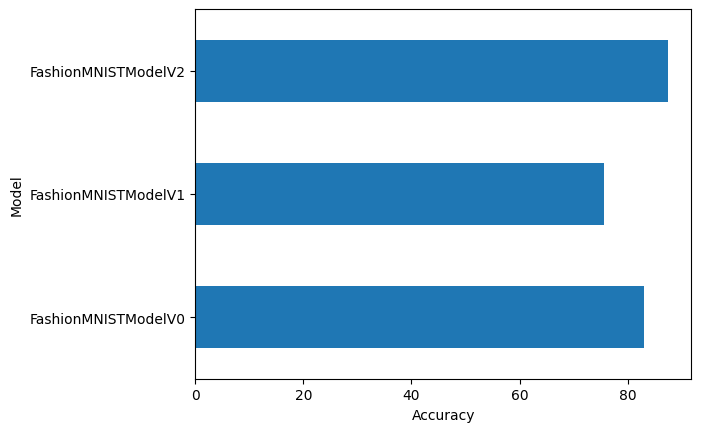

In [64]:
#Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy")
plt.ylabel("Model")

In [72]:
# Predict

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())
  # stack the pred_probs to turn list inot a tensor
  return torch.stack(pred_probs)


In [73]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape} \nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28]) 
Test sample label: 5 (Sandal)


In [74]:
# Make predictions on test sample with model 2
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[6.6691e-07, 2.4727e-08, 2.9527e-07, 8.0542e-08, 1.4702e-08, 9.9978e-01,
         5.9680e-08, 4.8010e-05, 4.3856e-05, 1.2487e-04],
        [1.3327e-01, 4.3570e-01, 2.6599e-03, 3.5438e-01, 2.3786e-02, 1.3555e-04,
         4.8163e-02, 4.9558e-04, 6.5974e-04, 7.5649e-04]])

In [75]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 6, 4, 7, 1])

In [77]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 2, 3, 6, 4, 7, 1]))

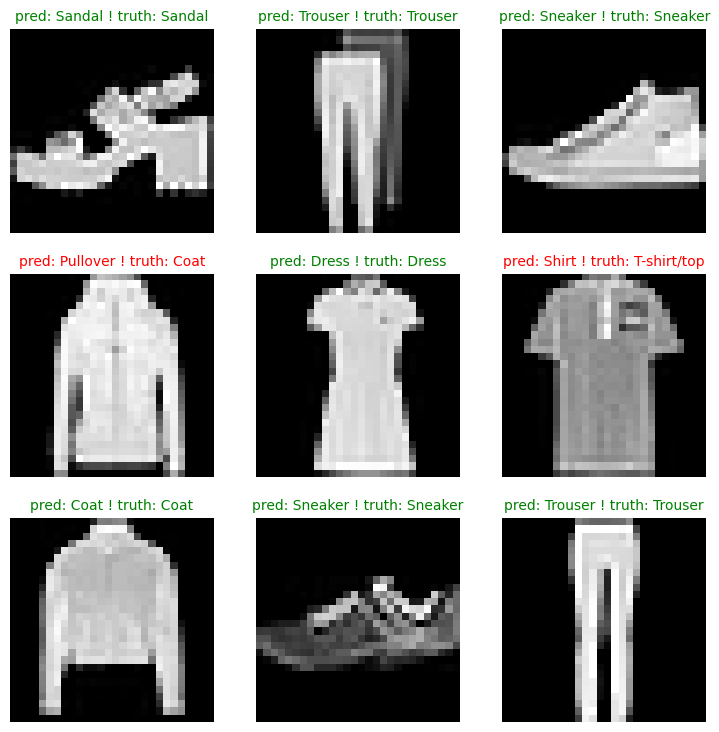

In [78]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)
  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  # Find the predictionlabel
  pred_label = class_names[pred_classes[i]]

  # Truth label
  truth_label = class_names[test_labels[i]]
  title_text = f"pred: {pred_label} ! truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False)

In [79]:
# Import tqdm fo progress bar
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([3, 0, 8,  ..., 2, 5, 8])

In [80]:
# see if torchmetrics exists, if not , install it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 20.2 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [81]:
# Import mlxtend
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split('.')[1]) >= 19

0.23.1


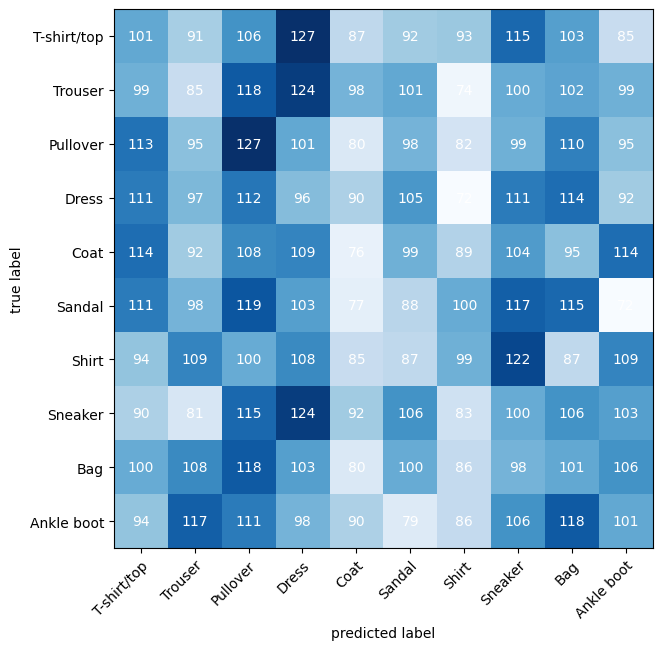

In [84]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
#3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

### Save and load best performing model

In [86]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


saving model to: models/03_pytorch_computer_vision_model_2.pth


In [87]:
# Create a new instance of FashionMNISTModelV2
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

<ipython-input-87-5bea2cfdf091>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [88]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34570303559303284,
 'model_acc': 87.44009584664536}

In [ ]:
# Check to see if results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08,
              rtol=0.0001
              )